In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import joblib

In [5]:
# Load the dataset
df = pd.read_csv("./ALL_BUS/history_all.csv")

In [7]:
df = df[["travel_time","day_of_week","hour_of_day","weekend","rush_hour","Direction"]]

In [9]:
# Encode categorical features: 'Direction'
label_encoder = LabelEncoder()
df['Direction'] = label_encoder.fit_transform(df['Direction'])

In [10]:
df.head()

,travel_time,day_of_week,hour_of_day,weekend,rush_hour,Direction
0,52.650000,3,8.25,0,1,0
1,57.133333,3,10.50,0,0,1
2,63.500000,3,13.25,0,0,0
3,57.283333,3,16.50,0,1,1
4,53.866667,4,8.00,0,1,0


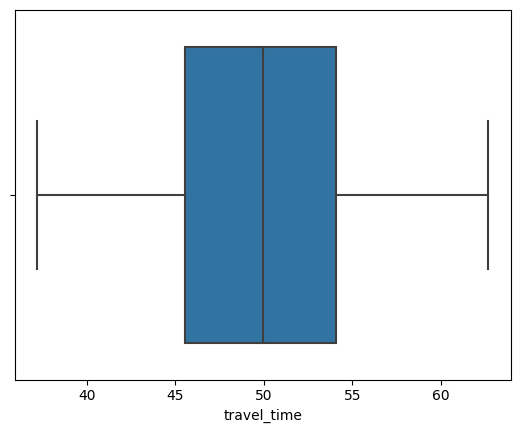

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'travel_time' using a box plot
sns.boxplot(x=df['travel_time'])
plt.show()

In [34]:
from scipy.stats import zscore

# Calculate z-scores for 'travel_time'
z_scores = zscore(df['travel_time'])

# Find and remove outliers based on z-score (threshold = 2)
outlier_indices = (z_scores > 2) | (z_scores < -2)
df = df[~outlier_indices]


In [36]:
# Define features and target variable
X = df[['hour_of_day', 'day_of_week', 'Direction', 'rush_hour']]
y = df['travel_time']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict travel_time on the test set
predictions = model.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Save the trained model for future use
joblib.dump(model, 'travel_time_prediction_model.pkl')

Mean Squared Error: 30.49702645709133


['travel_time_prediction_model.pkl']

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict travel_time on the test set
predictions = model.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Save the trained model for future use
joblib.dump(model, 'gradient_boosting_travel_time_model.pkl')


Mean Squared Error: 24.688444601348998


['gradient_boosting_travel_time_model.pkl']

In [39]:
import xgboost as xgb

# Set the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Predict travel_time on the test set using the best model
predictions = best_model.predict(X_test)

# Calculate the mean squared error to evaluate the best model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (Best Model):", mse)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (Best Model): 24.370356804297057


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

features = ['hour_of_day', 'day_of_week', 'Direction', 'rush_hour']
# Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (Neural Network):", mse)


Epoch 1/100
66/66 [==============================] - 1s 4ms/step - loss: 1460.7134 - val_loss: 216.1836
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 175.9858 - val_loss: 181.0675
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 159.7072 - val_loss: 168.0415
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 149.9926 - val_loss: 161.2279
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 140.3651 - val_loss: 146.9889
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 129.4929 - val_loss: 133.9020
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 117.6893 - val_loss: 122.9669
Epoch 8/100
66/66 [==============================] - 0s 2ms/step - loss: 105.1084 - val_loss: 106.4598
Epoch 9/100
66/66 [==============================] - 0s 2ms/step - loss: 93.2499 - val_loss: 92.6586
Epoch 10/100
66/66 [==============================] - 0s 2ms/step - loss: 